In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from  sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
...,...,...,...,...
15825,1429756073,44,False,53.624115
15826,1429756373,45,False,59.752296
15827,1429756673,48,False,52.147630
15828,1429756973,26,False,58.007545


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [5]:
data.isna().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [6]:
data.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [7]:
mn = OrdinalEncoder()
data['is_anomaly'] = mn.fit_transform(data[['is_anomaly']])

In [8]:
data

,timestamp,value,is_anomaly,predicted
0,1425008573,42,0.0,44.072500
1,1425008873,41,0.0,50.709390
2,1425009173,41,0.0,81.405120
3,1425009473,61,0.0,39.950367
4,1425009773,44,0.0,35.350160
...,...,...,...,...
15825,1429756073,44,0.0,53.624115
15826,1429756373,45,0.0,59.752296
15827,1429756673,48,0.0,52.147630
15828,1429756973,26,0.0,58.007545


# EDA

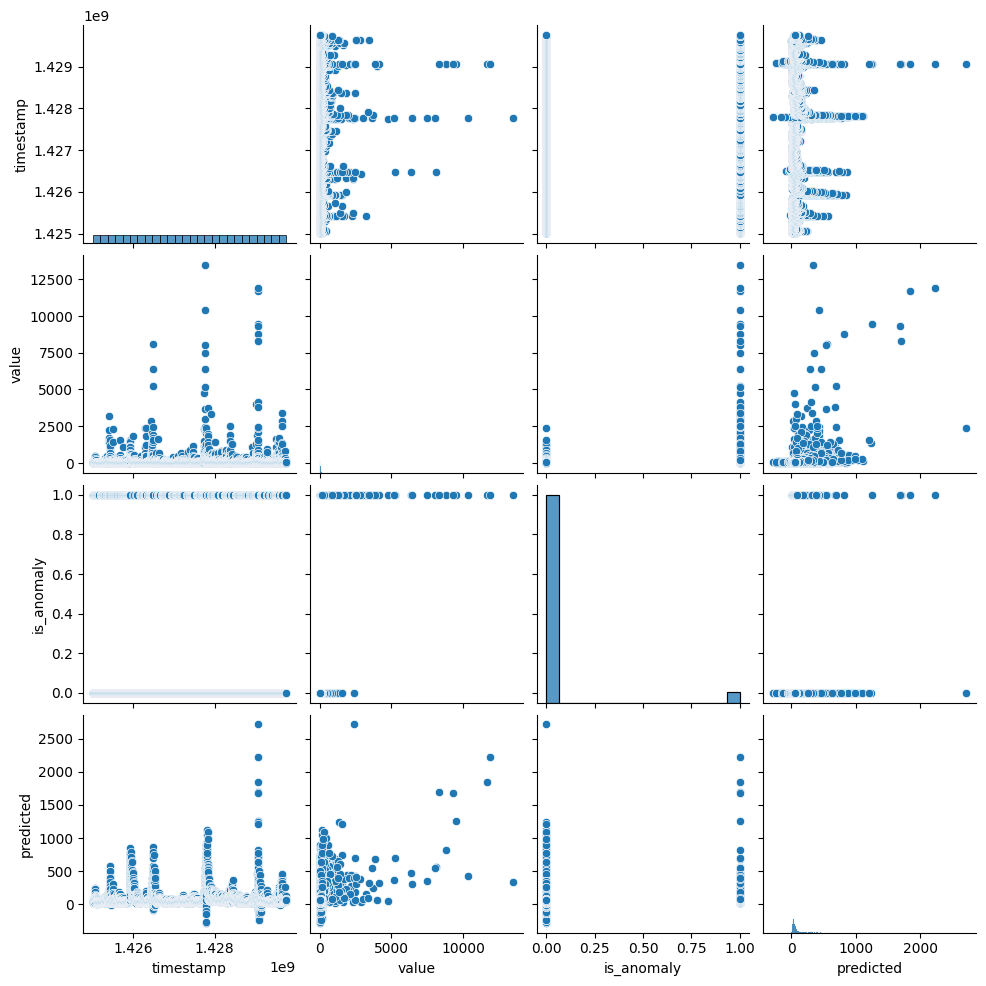

In [9]:
sns.pairplot(data)

<Axes: >

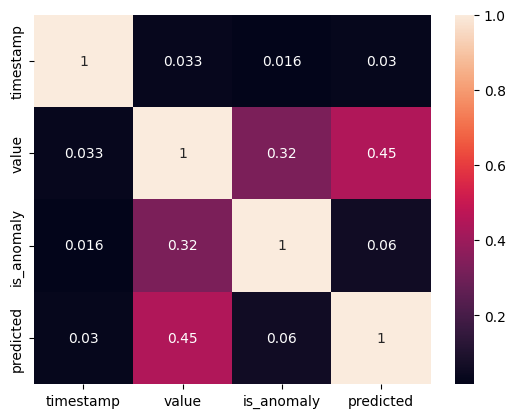

In [10]:
sns.heatmap(data.corr(), annot=True)

In [11]:
x = data.drop('is_anomaly',axis=1)
y = data['is_anomaly']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)


0.9446690247599798

In [16]:
model1 = SVC()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)

0.9446690247599798

In [17]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)

0.9663971702880243

In [18]:
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
accuracy_score(y_test, pred)

0.9747347145022739